# Bike Shring Demand : Exploratory Data Analysis

이 노트북에서는 캐글의 Bike Sahring Demand 데이터를 분석해 볼것이다.

데이터를 통해 알별 자전거 대여 수를 예측하는 것이  목적이지만, 
여기서는 몇가지 탐사분석을 수행할 것이다.


알고싶은 것들

- datetime Feature에서 알수 있는것은?
- casual과 registered에는 어떠한 차이가 있는가?
- temp, atemp 실제온도와 체감온도는 어떤 차이를 만드는가?

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
train = pd.read_csv("train.csv",parse_dates=["datetime"])

In [12]:
#Train dataset 확인
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
#train dataset의 정보나열
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


위 정보를 통해 10886의 데이터가 존재한다는 것을 확인

Missing Data는 없다.

In [6]:
# 기술 통계학적 관점으로 데이터보기(평균,분산,최대값, 최소값,사분위수)
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


범주형 데이터와 연속형 데이터 구분

범주형 : season, holiday, workingday, weather

연속형 : temp, atmep, humidity, windspeed, casual, registered, count

## datetime Feature에서 알수 있는것은?

datetime 데이터 년,월,일로 나누기

In [15]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day

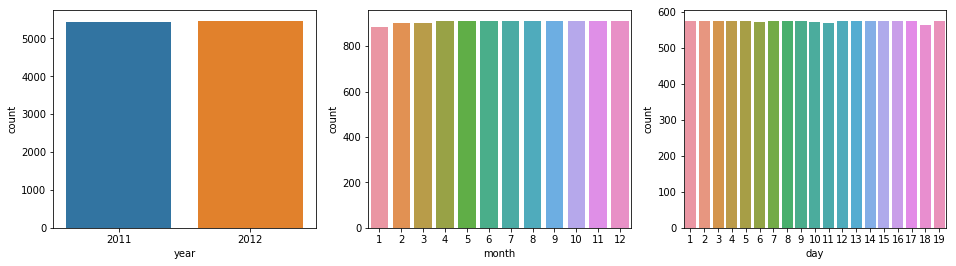

In [27]:
figure, (ax1,ax2,ax3 )= plt.subplots(nrows=1,ncols=3)
figure.set_size_inches(16,4)
sns.countplot(train["year"],ax=ax1)
sns.countplot(train["month"],ax=ax2)
sns.countplot(train["day"],ax=ax3)

년,월,일 모두 비슷하게 카운트가 되고있다. 특이점으로는 Train 데이터에서는 day가 19일까지만 존재한다.

이제 년,월,일별 자전거 대여수를 알아보자

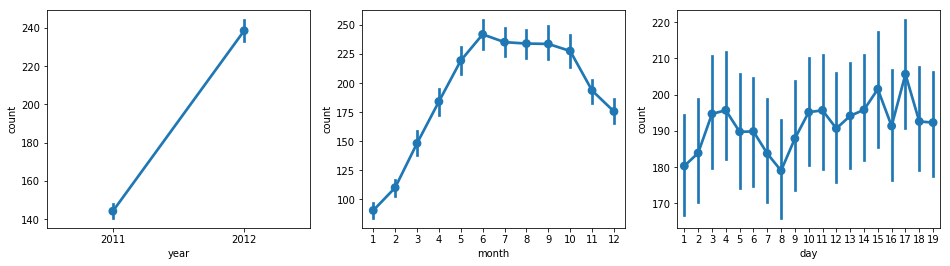

In [28]:
figure, (ax1,ax2,ax3 )= plt.subplots(nrows=1,ncols=3)
figure.set_size_inches(16,4)
sns.pointplot(train["year"],train["count"],ax=ax1)
sns.pointplot(train["month"],train["count"],ax=ax2)
sns.pointplot(train["day"],train["count"],ax=ax3)

- 2011년도 보다 2012년도에 자전거 대여수가 증가한 것을 확인할수 있다. 즉 자전거 대여회사가 성장하고 있다는 것을 확인 할 수 있다.

- month를 통해 겨울보다는 봄, 여름, 가을에 자전거를 많이 대여한다는 것을 확인 할 수 있다.

- day 는 count의 변동이 크고 특정 패턴을 확인하기 어렵다.

________________________________

대여회사를 성장세를 확인하기 위해 년-월 데이터를 생성하자

In [30]:
train['year-month'] = train['year'].astype(str) + '-' + train["month"].astype(str)

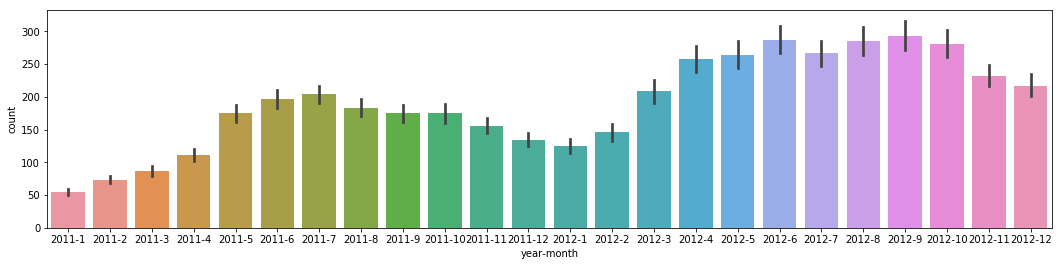

In [36]:
figure,ax = plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(18,4)
sns.barplot(train["year-month"], train["count"])

년도별 증가세를 시각화하여 확인

_________________________________________________

년,월별 holiday와 workingday

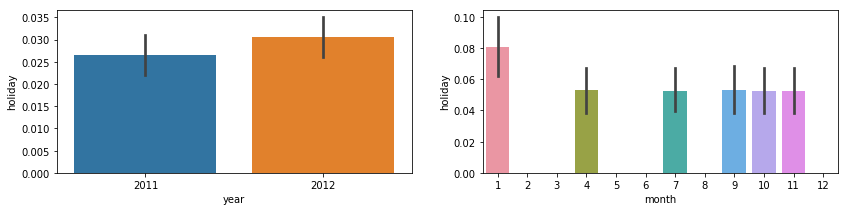

In [48]:
figure, (ax1,ax2) = plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(14,3)
sns.barplot(train["year"], train["holiday"],ax=ax1)
sns.barplot(train["month"], train["holiday"],ax=ax2)

12년도가 공휴일이 많다. 득히 1월달에 공휴일이 많이 존재한다.

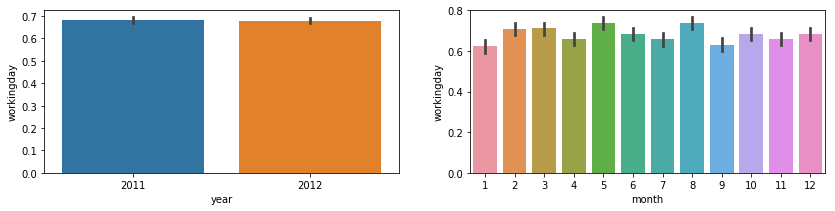

In [49]:
figure, (ax1,ax2) = plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(14,3)
sns.barplot(train["year"], train["workingday"],ax=ax1)
sns.barplot(train["month"], train["workingday"],ax=ax2)

wokringday는 큰 차이와 패턴을 보이지 않는다.

 ## casual과 registered에는 어떠한 차이가 있는가?

workingday일때 둘의 차이

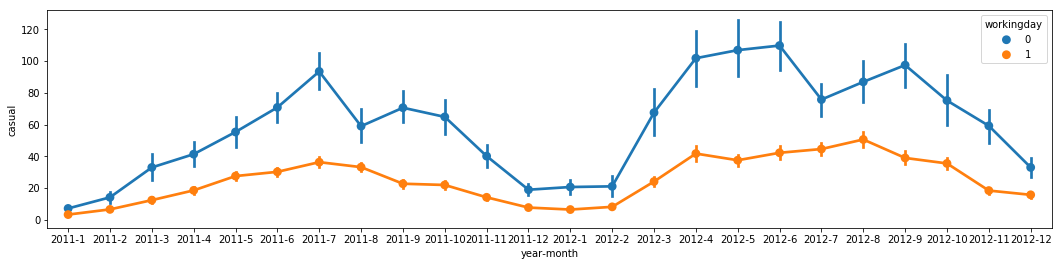

In [59]:
figure,ax = plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(18,4)
sns.pointplot(train["year-month"], train["casual"],hue=train["workingday"])


비정기 등록자가 아닌 경우 workingday일때 아닐때 자전거 대여수의 차이가 크다는것을 알수있다.

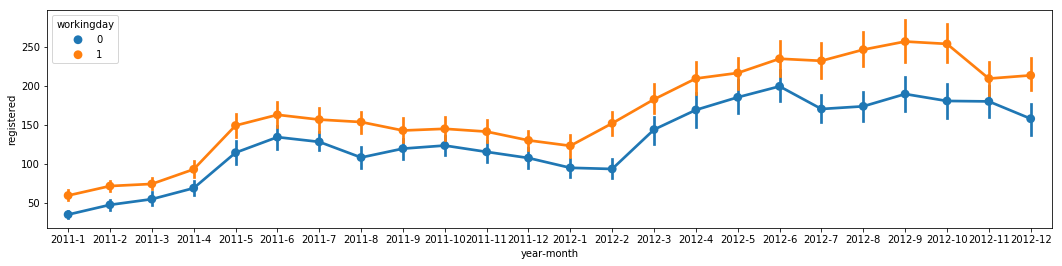

In [60]:
figure,ax = plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(18,4)
sns.pointplot(train["year-month"], train["registered"],hue=train["workingday"])

정기 등록자가 아닌 경우 workingday일때 아닐때 자전거 대여수의 차이가 크지 않다는 것을 알수있다.

______________________

holiday일때 둘의 차이

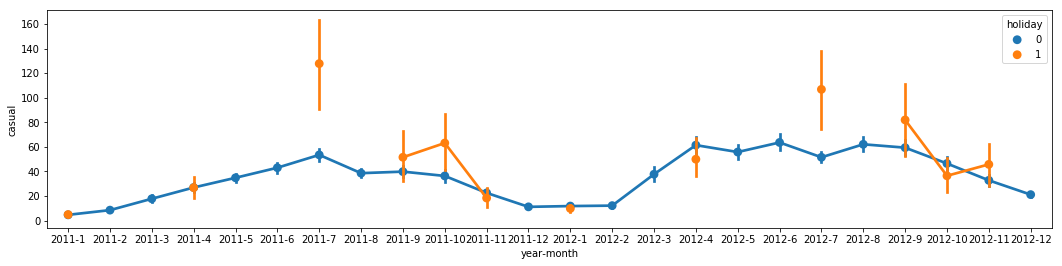

In [62]:
figure,ax = plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(18,4)
sns.pointplot(train["year-month"], train["casual"],hue=train["holiday"])


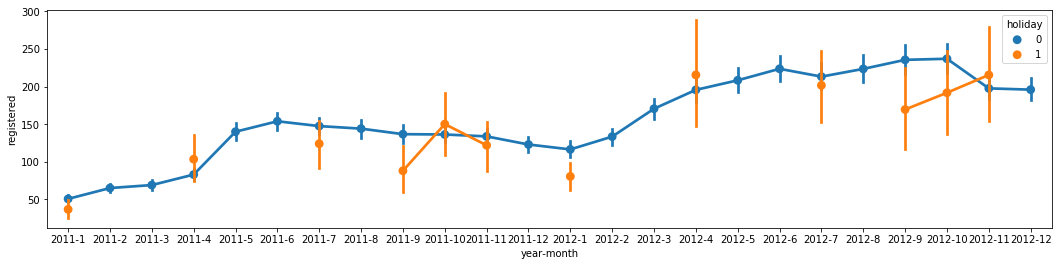

In [63]:
figure,ax = plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(18,4)
sns.pointplot(train["year-month"], train["registered"],hue=train["holiday"])


holiday가 아닐때 대여량은 정기 등록자가 확실히 큰 편이다. 하지만 holiday일때의 그래프로는 특정 정보를 얻을 수 없다.

________________________________________________________________

습도와 casual, registered의 관계

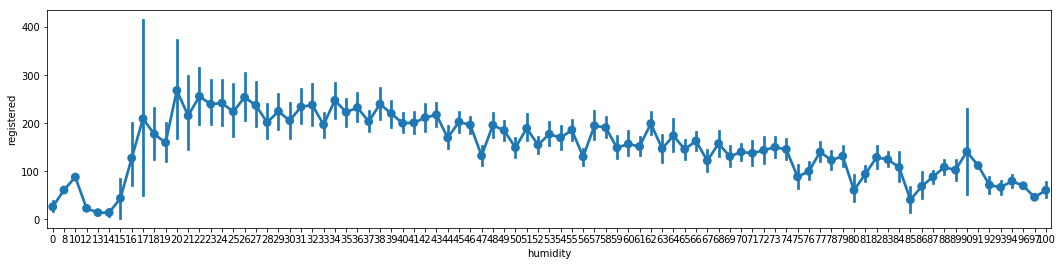

In [67]:
figure,ax = plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(18,4)
sns.pointplot(train["humidity"], train["registered"])

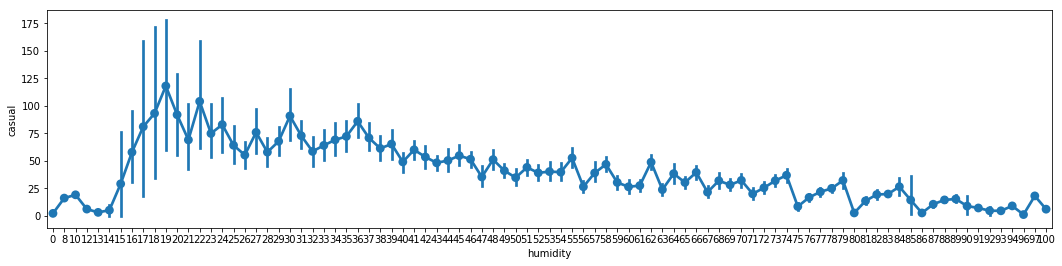

In [68]:
figure,ax = plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(18,4)
sns.pointplot(train["humidity"], train["casual"])

casual, registered 모두 습도가 높을 경우 자건거 대여량이 줄어드는 것을 확인할 수 있다.

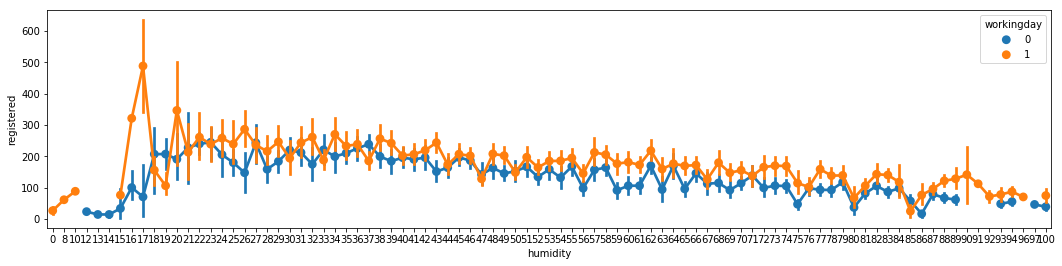

In [69]:
figure,ax = plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(18,4)
sns.pointplot(train["humidity"], train["registered"],hue=train['workingday'])

정기등록자의 경우 wokringday일때는 습도가 높아지더라도 어느정도 자전거를 대여한다. 출근을 위해서라는 것을 추측할 수 있다.

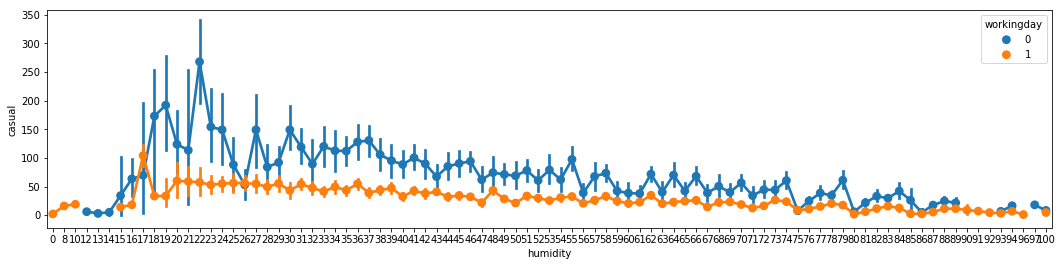

In [70]:
figure,ax = plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(18,4)
sns.pointplot(train["humidity"], train["casual"],hue=train['workingday'])

casual 이용자의 경우 workingday일때 아닐때 습도에 따라 자전거 대여량의 차이가 크다

- 이 두 그래프를 통해 정기등록자의 경우 자전거를 이용하는 직장인, 비정기등록자는 비직장인 또는 도보로 이동하는 직장인이라는 결론을 내릴수 있다. 

## temp, atemp 실제온도와 체감온도는 어떤 차이를 만드는가?

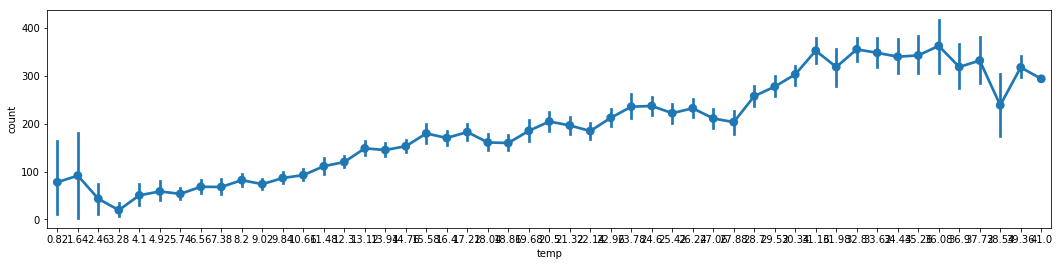

In [72]:
figure,ax = plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(18,4)
sns.pointplot(train["temp"], train["count"])

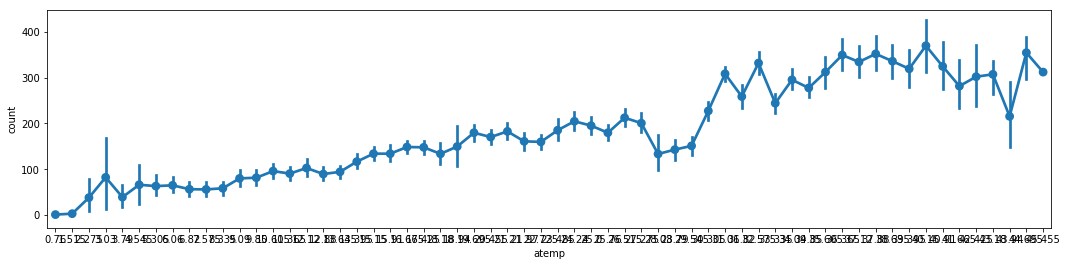

In [73]:
figure,ax = plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(18,4)
sns.pointplot(train["atemp"], train["count"])

약간의 차이가 있지만 특정 패턴은 발견되지 않는다. 그렇다면 체감온도와 온도의 차이는 어떤 의미가 있는가 확인해보자

In [75]:
train['diff_temp'] = train['atemp'] - train['temp']

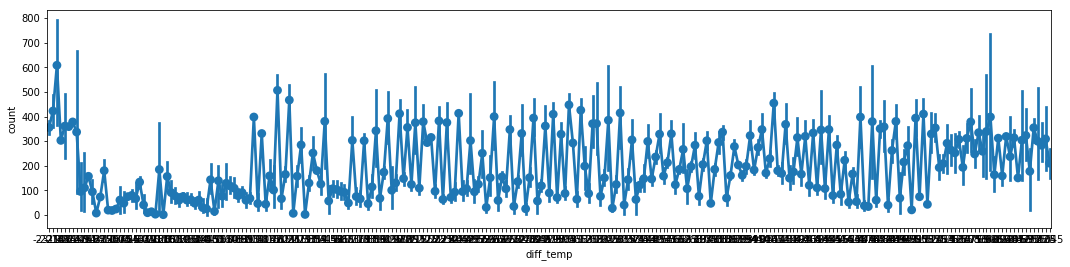

In [77]:
figure,ax = plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(18,4)
sns.pointplot(train["diff_temp"], train["count"])

체감온도와 온도 사이에서도 특정 패턴을 발견할 수 없다.